<a href="https://colab.research.google.com/github/plaban1981/question_generation/blob/master/Custom_Q%26A_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.mkdir('squad')

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 13.8 MB/s 
     |████████████████████████████████| 7.6 MB 64.1 MB/s 
     |████████████████████████████████| 182 kB 90.0 MB/s 


## Get and Prepare Data

* Download SQuAD data

In [3]:
import requests
url = 'https://rajpurkar.github.io/SQuAD-explorer/dataset/'
res = requests.get(f'{url}train-v2.0.json')
res

<Response [200]>

https://raw.githubusercontent.com/rajpurkar/SQuAD-explorer/master/dataset/dev-v2.0.json

In [4]:
for file in ['train-v2.0.json', 'dev-v2.0.json']:
    res = requests.get(f'{url}{file}')
    print(res)
    # write to file
    with open(f'./squad/{file}', 'wb') as f:
        for chunk in res.iter_content(chunk_size=4):
            f.write(chunk)

<Response [200]>
<Response [200]>


In [5]:
for file in ['train-v2.0.json','dev-v2.json']:
  res = requests.get(f'{url}{file}')
  with open(f'squad/{file}',"wb") as f:
    for chunk in res.iter_content(chunk_size=4):
      f.write(chunk)

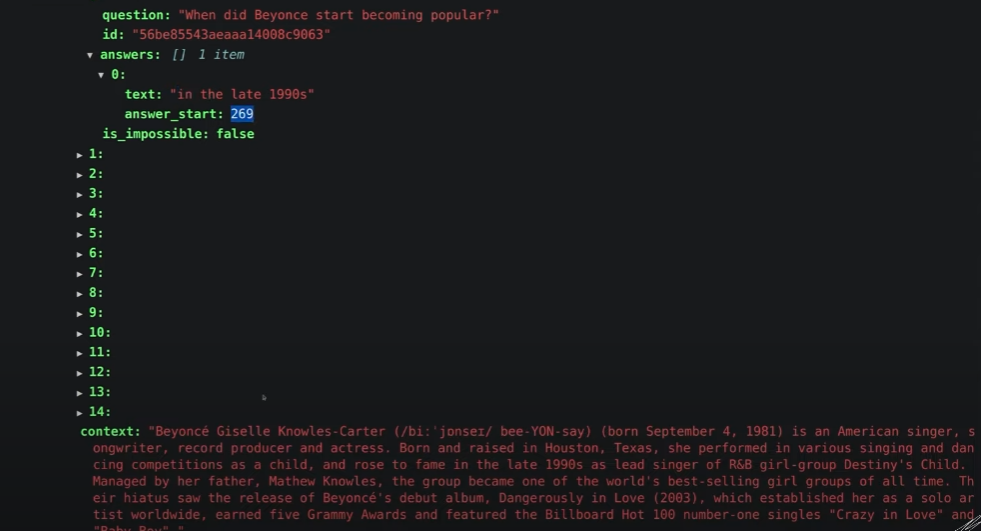

## Data Preparation

In [6]:
import json
from tqdm import tqdm
def read_squad(path):
  with open(path,'rb') as f:
    squad_dict = json.load(f)
  #
  contexts = []
  answers = []
  question = []
  #
  for group in tqdm(squad_dict['data']):
    for passage in group['paragraphs']:
      for ques in passage['qas']:
        if 'plausible_answers' in ques.keys():
          for ans in ques['plausible_answers']:
            contexts.append(passage['context'])
            question.append(ques['question'])
            answers.append(ans)
        else:
          for ans in ques['answers']:
            contexts.append(passage['context'])
            question.append(ques['question'])
            answers.append(ans)
  return contexts,question,answers


In [12]:
with open("/content/squad/train-v2.0.json",'rb') as f:
    squad_data = json.load(f)

In [13]:
squad_data.keys()

dict_keys(['version', 'data'])

In [14]:
squad_data['data'][1]

{'title': 'Frédéric_Chopin',
 'paragraphs': [{'qas': [{'question': "What was Frédéric's nationalities?",
     'id': '56cbd2356d243a140015ed66',
     'answers': [{'text': 'Polish and French', 'answer_start': 182}],
     'is_impossible': False},
    {'question': 'In what era was Frédéric active in?',
     'id': '56cbd2356d243a140015ed67',
     'answers': [{'text': 'Romantic era', 'answer_start': 276}],
     'is_impossible': False},
    {'question': 'For what instrument did Frédéric write primarily for?',
     'id': '56cbd2356d243a140015ed68',
     'answers': [{'text': 'solo piano', 'answer_start': 318}],
     'is_impossible': False},
    {'question': 'In what area was Frédéric born in?',
     'id': '56cbd2356d243a140015ed69',
     'answers': [{'text': 'Duchy of Warsaw', 'answer_start': 559}],
     'is_impossible': False},
    {'question': 'At what age did Frédéric depart from Poland?',
     'id': '56cbd2356d243a140015ed6a',
     'answers': [{'text': '20', 'answer_start': 777}],
     'is_

In [15]:
squad_data['data'][1]['title']

'Frédéric_Chopin'

In [16]:
squad_data['data'][1]['paragraphs'][0]

{'qas': [{'question': "What was Frédéric's nationalities?",
   'id': '56cbd2356d243a140015ed66',
   'answers': [{'text': 'Polish and French', 'answer_start': 182}],
   'is_impossible': False},
  {'question': 'In what era was Frédéric active in?',
   'id': '56cbd2356d243a140015ed67',
   'answers': [{'text': 'Romantic era', 'answer_start': 276}],
   'is_impossible': False},
  {'question': 'For what instrument did Frédéric write primarily for?',
   'id': '56cbd2356d243a140015ed68',
   'answers': [{'text': 'solo piano', 'answer_start': 318}],
   'is_impossible': False},
  {'question': 'In what area was Frédéric born in?',
   'id': '56cbd2356d243a140015ed69',
   'answers': [{'text': 'Duchy of Warsaw', 'answer_start': 559}],
   'is_impossible': False},
  {'question': 'At what age did Frédéric depart from Poland?',
   'id': '56cbd2356d243a140015ed6a',
   'answers': [{'text': '20', 'answer_start': 777}],
   'is_impossible': False},
  {'question': 'What year was Chopin born?',
   'id': '56ce0a3

In [17]:
squad_data['data'][1]['paragraphs'][0]['context']

'Frédéric François Chopin (/ˈʃoʊpæn/; French pronunciation: \u200b[fʁe.de.ʁik fʁɑ̃.swa ʃɔ.pɛ̃]; 22 February or 1 March 1810 – 17 October 1849), born Fryderyk Franciszek Chopin,[n 1] was a Polish and French (by citizenship and birth of father) composer and a virtuoso pianist of the Romantic era, who wrote primarily for the solo piano. He gained and has maintained renown worldwide as one of the leading musicians of his era, whose "poetic genius was based on a professional technique that was without equal in his generation." Chopin was born in what was then the Duchy of Warsaw, and grew up in Warsaw, which after 1815 became part of Congress Poland. A child prodigy, he completed his musical education and composed his earlier works in Warsaw before leaving Poland at the age of 20, less than a month before the outbreak of the November 1830 Uprising.'

In [18]:
for group in squad_data['data'][:10]:
  #print(group['title'])
  #print("\n")
  for passage in group['paragraphs']:
    print(passage['context'])
    for ques in passage['qas']:
      print(f"Question : {ques['question']}")
      if 'plausible_answers' in ques.keys():
        for ans in ques['plausible_answers']:
          print(f"Answer : {ans['text']}")
      else:
        for ans in ques['answers']:
          print(f"Answer : {ans['text']}")


Streaming output truncated to the last 5000 lines.
Question : Where did Twilight Princess place among Wii titles according to IGN?
Answer : 4th
Question : Where did Twilight Princess rank on Nintendo Power's list of Nintendo games in the 2000s?
Answer : third
Question : What 2 critics gave Twilight Princess awards for Best Graphics and Best Story?
Answer : IGN and Nintendo Power
Question : What award did Game Critics Awards and GameSpy give Twilight Princess?
Answer : Best Console Game
Question : What place did the game take in Nintendo's Official list of 100 Greatest Nintendo Games of All Time?
Answer : 16th
Question : What place did IGN give the game on the Wii console?
Answer : 4th
Question : What was Game Radar's rank among all Nintendo games according to Nintendo Magazine?
Answer : 16th
Question : Where did Twilight Princess place among Nintendo Power titles according to IGN?
Answer : 4th
Question : Where did Twilight Princess rank on Game Radar's list of Nintendo games in the 200

In [19]:
ques.keys()

dict_keys(['question', 'id', 'answers', 'is_impossible'])

In [20]:
from tqdm import tqdm
contexts = []
answers = []
question = []
for group in tqdm(squad_data['data']):
  for passage in group['paragraphs']:
    for ques in passage['qas']:
      if 'plausible_answers' in ques.keys():
        for ans in ques['plausible_answers']:
           contexts.append(passage['context'])
           question.append(ques['question'])
           answers.append(ans['text'])
      else:
        for ans in ques['answers']:
          contexts.append(passage['context'])
          question.append(ques['question'])
          answers.append(ans['text'])

100%|██████████| 442/442 [00:00<00:00, 4674.13it/s]


In [21]:
len(contexts),len(answers),len(question)

(130319, 130319, 130319)

In [22]:
contexts[:5]

['Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".',
 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead s

In [23]:
answers[:5]

['in the late 1990s',
 'singing and dancing',
 '2003',
 'Houston, Texas',
 'late 1990s']

In [24]:
question[:5]

['When did Beyonce start becoming popular?',
 'What areas did Beyonce compete in when she was growing up?',
 "When did Beyonce leave Destiny's Child and become a solo singer?",
 'In what city and state did Beyonce  grow up? ',
 'In which decade did Beyonce become famous?']

## Generate train and validation Question Answers data

In [7]:
train_path = "/content/squad/train-v2.0.json"
val_path = "/content/squad/dev-v2.0.json"
train_context,train_question,train_answers = read_squad(train_path)

100%|██████████| 442/442 [00:00<00:00, 6227.79it/s]


In [8]:
val_context,val_question,val_answers = read_squad(val_path)

100%|██████████| 35/35 [00:00<00:00, 3010.55it/s]


In [9]:
len(train_context),len(train_question),len(train_answers)

(130319, 130319, 130319)

In [10]:
len(val_context),len(val_question),len(val_answers)

(26232, 26232, 26232)

In [11]:
train_context[:2]

['Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".',
 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead s

In [12]:
val_context[:2]

['The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.',
 'The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates 

In [13]:
train_answers[0]

{'text': 'in the late 1990s', 'answer_start': 269}

In [14]:
val_answers[0]

{'text': 'France', 'answer_start': 159}

## Now format the answer to contain end position so that we have the training data 

In [15]:
def add_end_idx(answers, contexts):
    # loop through each answer-context pair
    for answer, context in zip(answers, contexts):
        # gold_text refers to the answer we are expecting to find in context
        gold_text = answer['text']
        # we already know the start index
        start_idx = answer['answer_start']
        # and ideally this would be the end index...
        end_idx = start_idx + len(gold_text)

        # ...however, sometimes squad answers are off by a character or two
        if context[start_idx:end_idx] == gold_text:
            # if the answer is not off :)
            answer['answer_end'] = end_idx
        else:
            for n in [1, 2]:
                if context[start_idx-n:end_idx-n] == gold_text:
                    # this means the answer is off by 'n' tokens
                    answer['answer_start'] = start_idx - n
                    answer['answer_end'] = end_idx - n

In [16]:
add_end_idx(train_answers, train_context)
add_end_idx(val_answers, val_context)

In [17]:
val_answers[0]

{'text': 'France', 'answer_start': 159, 'answer_end': 165}

In [18]:
train_answers[0]

{'text': 'in the late 1990s', 'answer_start': 269, 'answer_end': 286}

## Tokenize / Encode the text

## Initialize tokenizer

In [19]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

* Merge Context and question using tokenizer. The context and question will be separated by a separator

In [20]:
train_encodings = tokenizer(train_context, train_question, truncation=True, padding=True)
val_encodings = tokenizer(val_context, val_question, truncation=True, padding=True)

In [21]:
train_encodings.keys()

dict_keys(['input_ids', 'attention_mask'])

In [18]:
tokenizer.decode(train_encodings['input_ids'][0])

'[CLS] beyonce giselle knowles - carter ( / biːˈjɒnseɪ / bee - yon - say ) ( born september 4, 1981 ) is an american singer, songwriter, record producer and actress. born and raised in houston, texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of r & b girl - group destiny\'s child. managed by her father, mathew knowles, the group became one of the world\'s best - selling girl groups of all time. their hiatus saw the release of beyonce\'s debut album, dangerously in love ( 2003 ), which established her as a solo artist worldwide, earned five grammy awards and featured the billboard hot 100 number - one singles " crazy in love " and " baby boy ". [SEP] when did beyonce start becoming popular? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [39]:
import gc

In [40]:
gc.collect()

122

In [19]:
train_answers[0]['answer_start']

269

In [20]:
train_answers[0]

{'text': 'in the late 1990s', 'answer_start': 269, 'answer_end': 286}

In [23]:
train_answers[0]['answer_end']

286

In [21]:
train_encodings.char_to_token(0,train_answers[0]['answer_end'])

In [22]:
train_encodings.char_to_token(0,train_answers[0]['answer_end'] -1)

70

In [22]:
def add_token_positions(encodings, answers):
    # initialize lists to contain the token indices of answer start/end
    start_positions = []
    end_positions = []
    for i in range(len(answers)):
        # append start/end token position using char_to_token method
        start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
        end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))

        # if start position is None, the answer passage has been truncated
        if start_positions[-1] is None:
            start_positions[-1] = tokenizer.model_max_length
        # end position cannot be found, char_to_token found space, so shift one token forward
        go_back = 1
        while end_positions[-1] is None:
            end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end']-go_back)
            go_back +=1
    # update our encodings object with the new token-based start/end positions
    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

# apply function to our data
add_token_positions(train_encodings, train_answers)
add_token_positions(val_encodings, val_answers)

In [23]:
train_encodings.keys()

dict_keys(['input_ids', 'attention_mask', 'start_positions', 'end_positions'])

In [26]:
train_encodings['start_positions'][:10]

[67, 55, 128, 47, 69, 81, 124, 91, 69, 72]

In [27]:
train_encodings['end_positions'][:10]

[70, 57, 129, 50, 70, 85, 126, 93, 70, 73]

## Create a Pytorch Dataset

In [24]:
import torch
class SquadDataset(torch.utils.data.Dataset):
  def __init__(self,encodings):
    self.encodings = encodings
  def __getitem__(self,idx):
    return {key:torch.tensor(val[idx]) for key,val in self.encodings.items()}
  def __len__(self):
    return len(self.encodings.input_ids)


In [25]:
train_dataset = SquadDataset(train_encodings)
val_dataset = SquadDataset(val_encodings)

In [26]:
train_dataset.__len__()

130319

In [27]:
val_dataset.__len__()

26232

In [56]:
train_dataset.__getitem__(0)

{'input_ids': tensor([  101, 20773, 21025, 19358, 22815,  1011,  5708,  1006,  1013, 12170,
         23432, 29715,  3501, 29678, 12325, 29685,  1013, 10506,  1011, 10930,
          2078,  1011,  2360,  1007,  1006,  2141,  2244,  1018,  1010,  3261,
          1007,  2003,  2019,  2137,  3220,  1010,  6009,  1010,  2501,  3135,
          1998,  3883,  1012,  2141,  1998,  2992,  1999,  5395,  1010,  3146,
          1010,  2016,  2864,  1999,  2536,  4823,  1998,  5613,  6479,  2004,
          1037,  2775,  1010,  1998,  3123,  2000,  4476,  1999,  1996,  2397,
          4134,  2004,  2599,  3220,  1997,  1054,  1004,  1038,  2611,  1011,
          2177, 10461,  1005,  1055,  2775,  1012,  3266,  2011,  2014,  2269,
          1010, 25436, 22815,  1010,  1996,  2177,  2150,  2028,  1997,  1996,
          2088,  1005,  1055,  2190,  1011,  4855,  2611,  2967,  1997,  2035,
          2051,  1012,  2037, 14221,  2387,  1996,  2713,  1997, 20773,  1005,
          1055,  2834,  2201,  1010, 20

## Fine Tune

In [28]:
from transformers import DistilBertForQuestionAnswering
model = DistilBertForQuestionAnswering.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this mode

In [29]:
from torch.utils.data import DataLoader
from transformers import AdamW
from torch import optim
from tqdm import tqdm

In [30]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = model.to(device)

In [31]:
model.train()
optimizer = AdamW(model.parameters(),lr=5e-5)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [41]:
train_loader = DataLoader(train_dataset,batch_size=8,shuffle=True)

In [42]:
for epoch in range(3):
  loop = tqdm(train_loader)
  for batch in loop:
    #set initial gradient to loop
    optimizer.zero_grad()
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)
    #
    outputs = model(input_ids,
                    attention_mask=attention_mask,
                    start_positions = start_positions,
                    end_positions = end_positions)
    loss = outputs[0]
    # algo update
    loss.backward()
    optimizer.step()
    #
    loop.set_description(f'epoch {epoch}')
    loop.set_postfix(loss=loss.item())

epoch 2: 100%|██████████| 16290/16290 [1:42:32<00:00,  2.65it/s, loss=0.727]


## Save Model

In [44]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#import os
#os.mkdir("/content/drive/MyDrive/Fine_Tune_QA")

In [45]:
model_path = '/content/drive/MyDrive/Fine_Tune_QA'
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/Fine_Tune_QA/tokenizer_config.json',
 '/content/drive/MyDrive/Fine_Tune_QA/special_tokens_map.json',
 '/content/drive/MyDrive/Fine_Tune_QA/vocab.txt',
 '/content/drive/MyDrive/Fine_Tune_QA/added_tokens.json',
 '/content/drive/MyDrive/Fine_Tune_QA/tokenizer.json')

## Evaluate the model

In [46]:
# switch model out of training mode
model.eval()

#val_sampler = SequentialSampler(val_dataset)
val_loader = DataLoader(val_dataset, batch_size=16)

acc = []

# initialize loop for progress bar
loop = tqdm(val_loader)
# loop through batches
for batch in loop:
    # we don't need to calculate gradients as we're not training
    with torch.no_grad():
        # pull batched items from loader
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        start_true = batch['start_positions'].to(device)
        end_true = batch['end_positions'].to(device)
        # make predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        # pull preds out
        start_pred = torch.argmax(outputs['start_logits'], dim=1)
        end_pred = torch.argmax(outputs['end_logits'], dim=1)
        # calculate accuracy for both and append to accuracy list
        acc.append(((start_pred == start_true).sum()/len(start_pred)).item())
        acc.append(((end_pred == end_true).sum()/len(end_pred)).item())
# calculate average accuracy in total
acc = sum(acc)/len(acc)

100%|██████████| 1640/1640 [06:50<00:00,  3.99it/s]


In [47]:
print("T/F\tstart\tend\n")
for i in range(len(start_true)):
    print(f"true\t{start_true[i]}\t{end_true[i]}\n"
          f"pred\t{start_pred[i]}\t{end_pred[i]}\n")

T/F	start	end

true	158	161
pred	66	68

true	158	161
pred	66	68

true	158	161
pred	66	68

true	158	161
pred	66	68

true	2	4
pred	2	4

true	18	21
pred	18	21

true	50	53
pred	50	52

true	100	103
pred	100	103

